In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [46]:
titanic = sns.load_dataset('titanic')

In [47]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [48]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [49]:
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [50]:
titanic.isnull().sum()['age']/titanic.shape[0] * 100
titanic.isnull().sum()['deck']/titanic.shape[0] * 100

np.float64(77.21661054994388)

<Axes: >

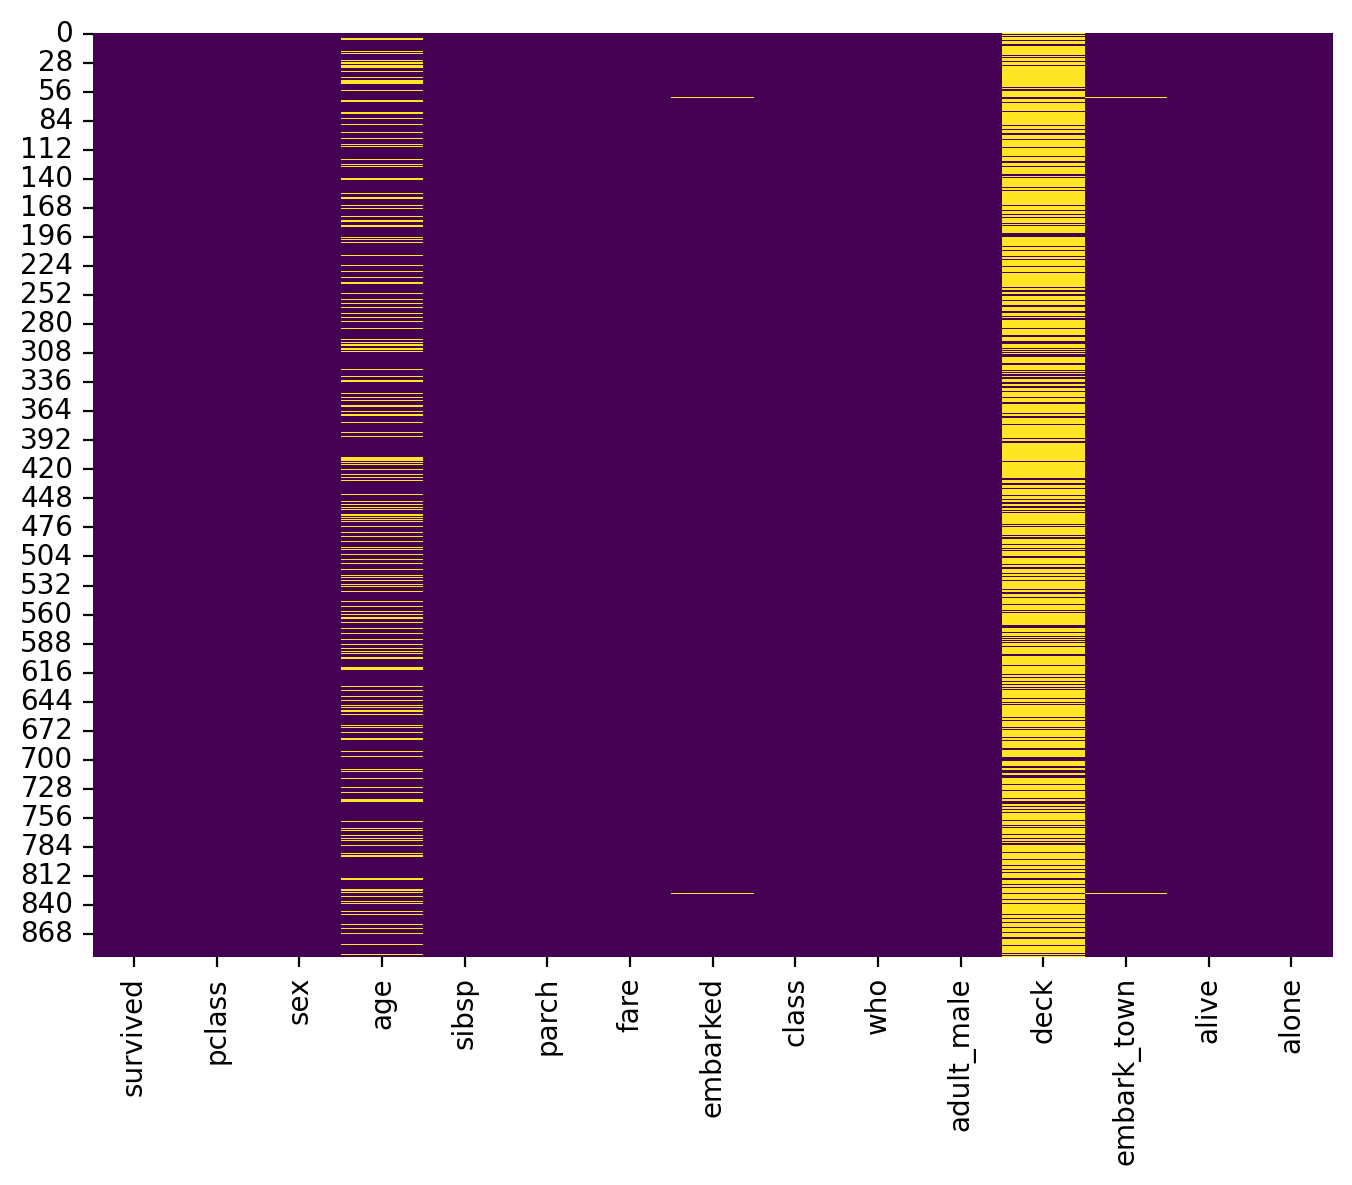

In [51]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 200
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')

<Axes: >

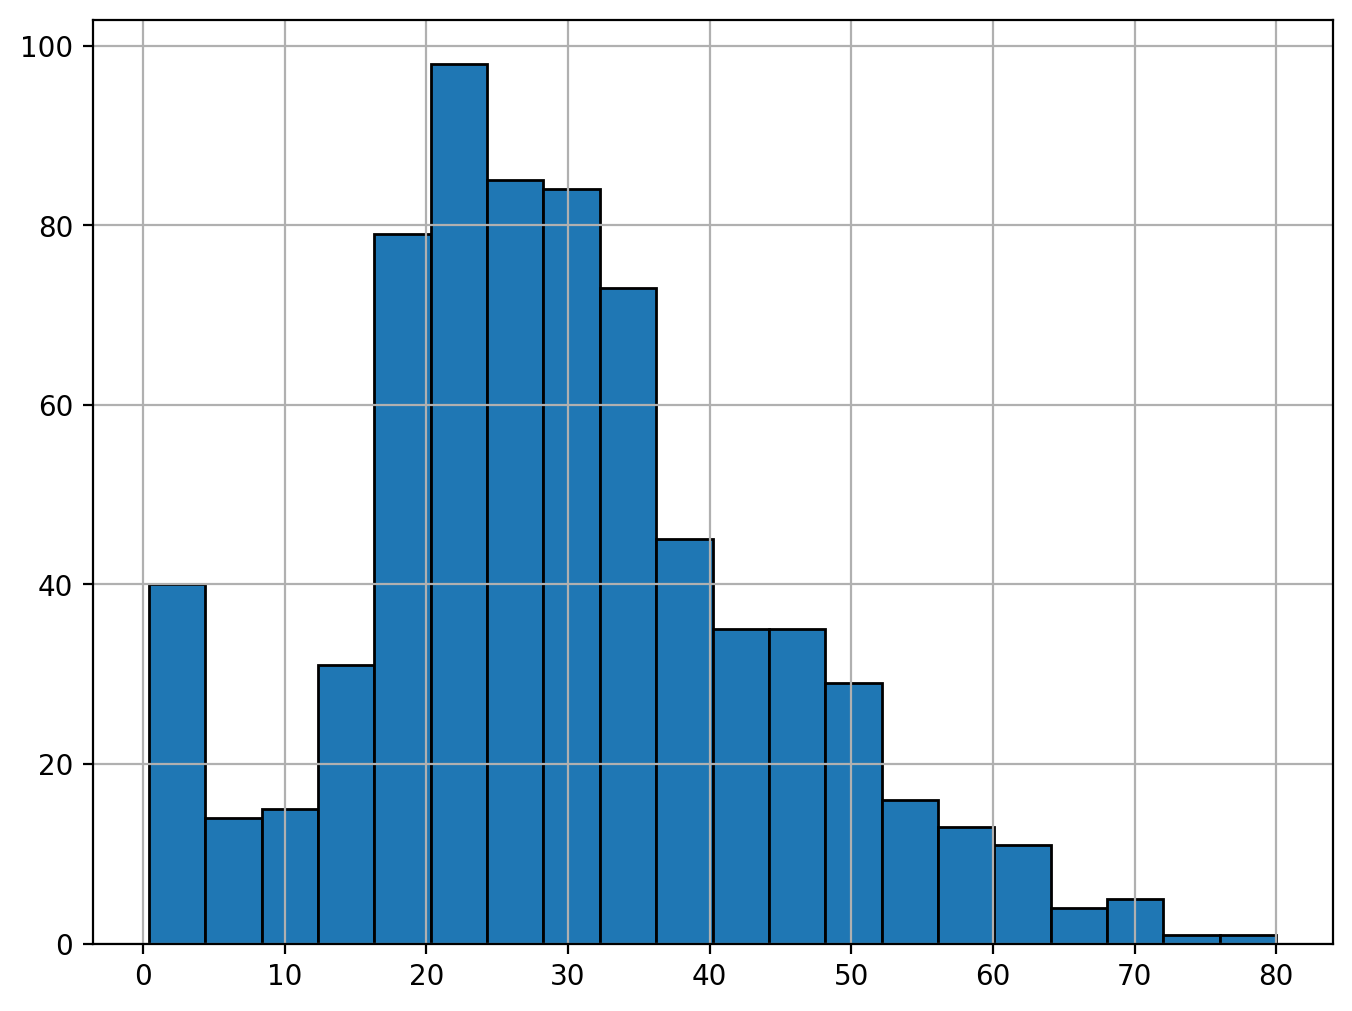

In [52]:
titanic['age'].hist(bins=20, edgecolor='black')

Text(0.5, 0, 'Age')

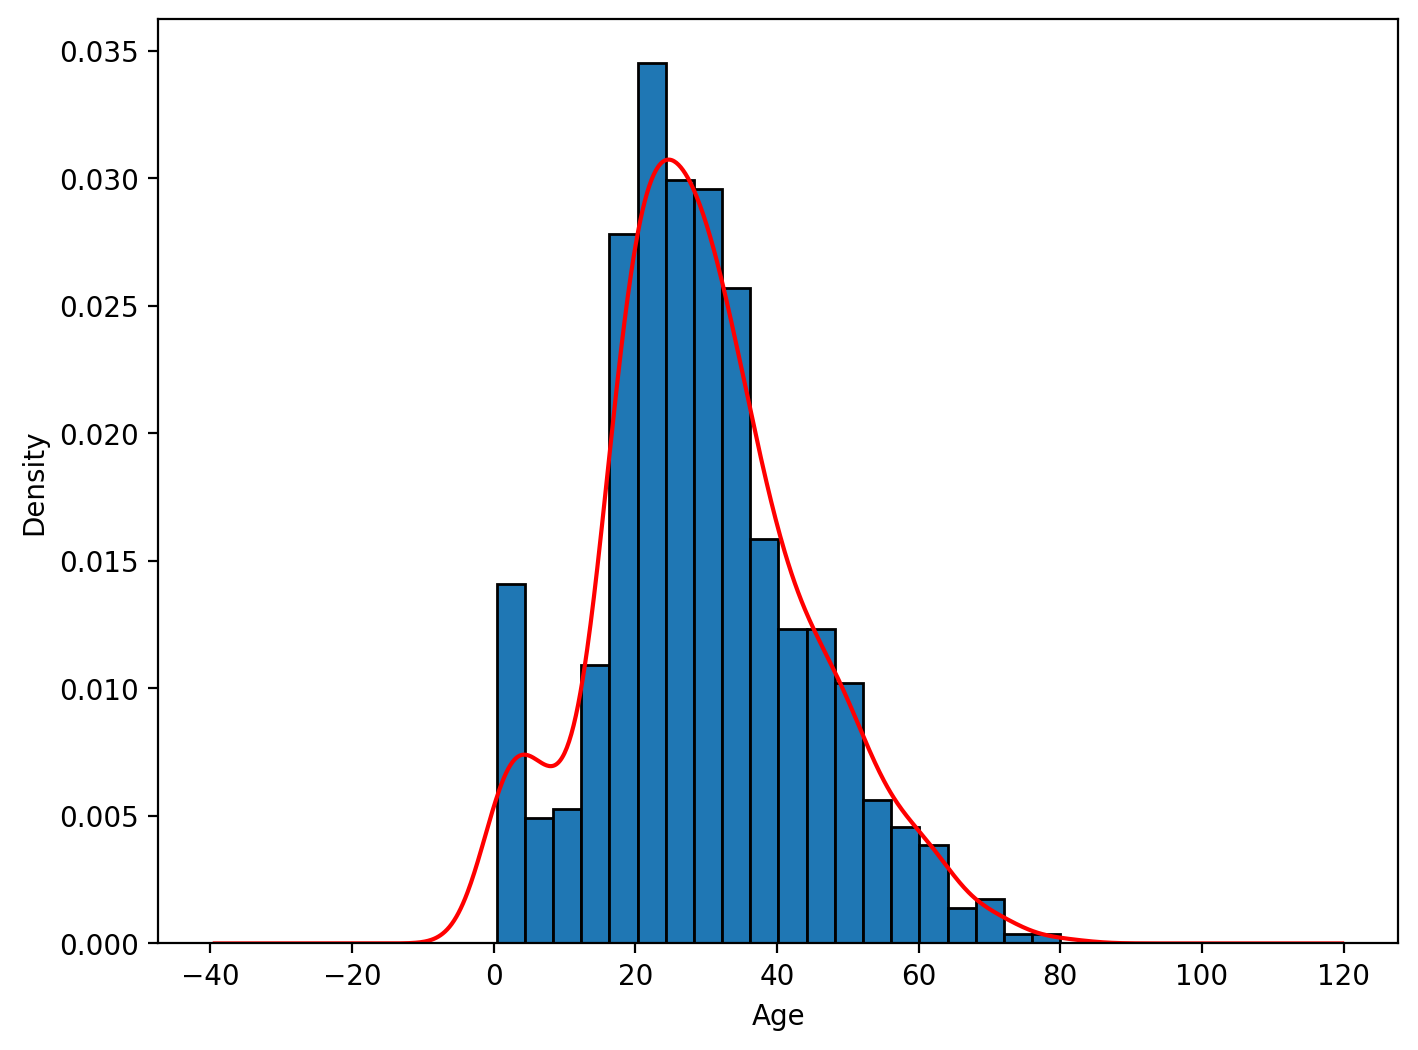

In [53]:
ax = titanic['age'].hist(bins=20, edgecolor='black', density=True)

titanic['age'].plot(kind='density', ax=ax, color='red')
ax.set_xlabel('Age')


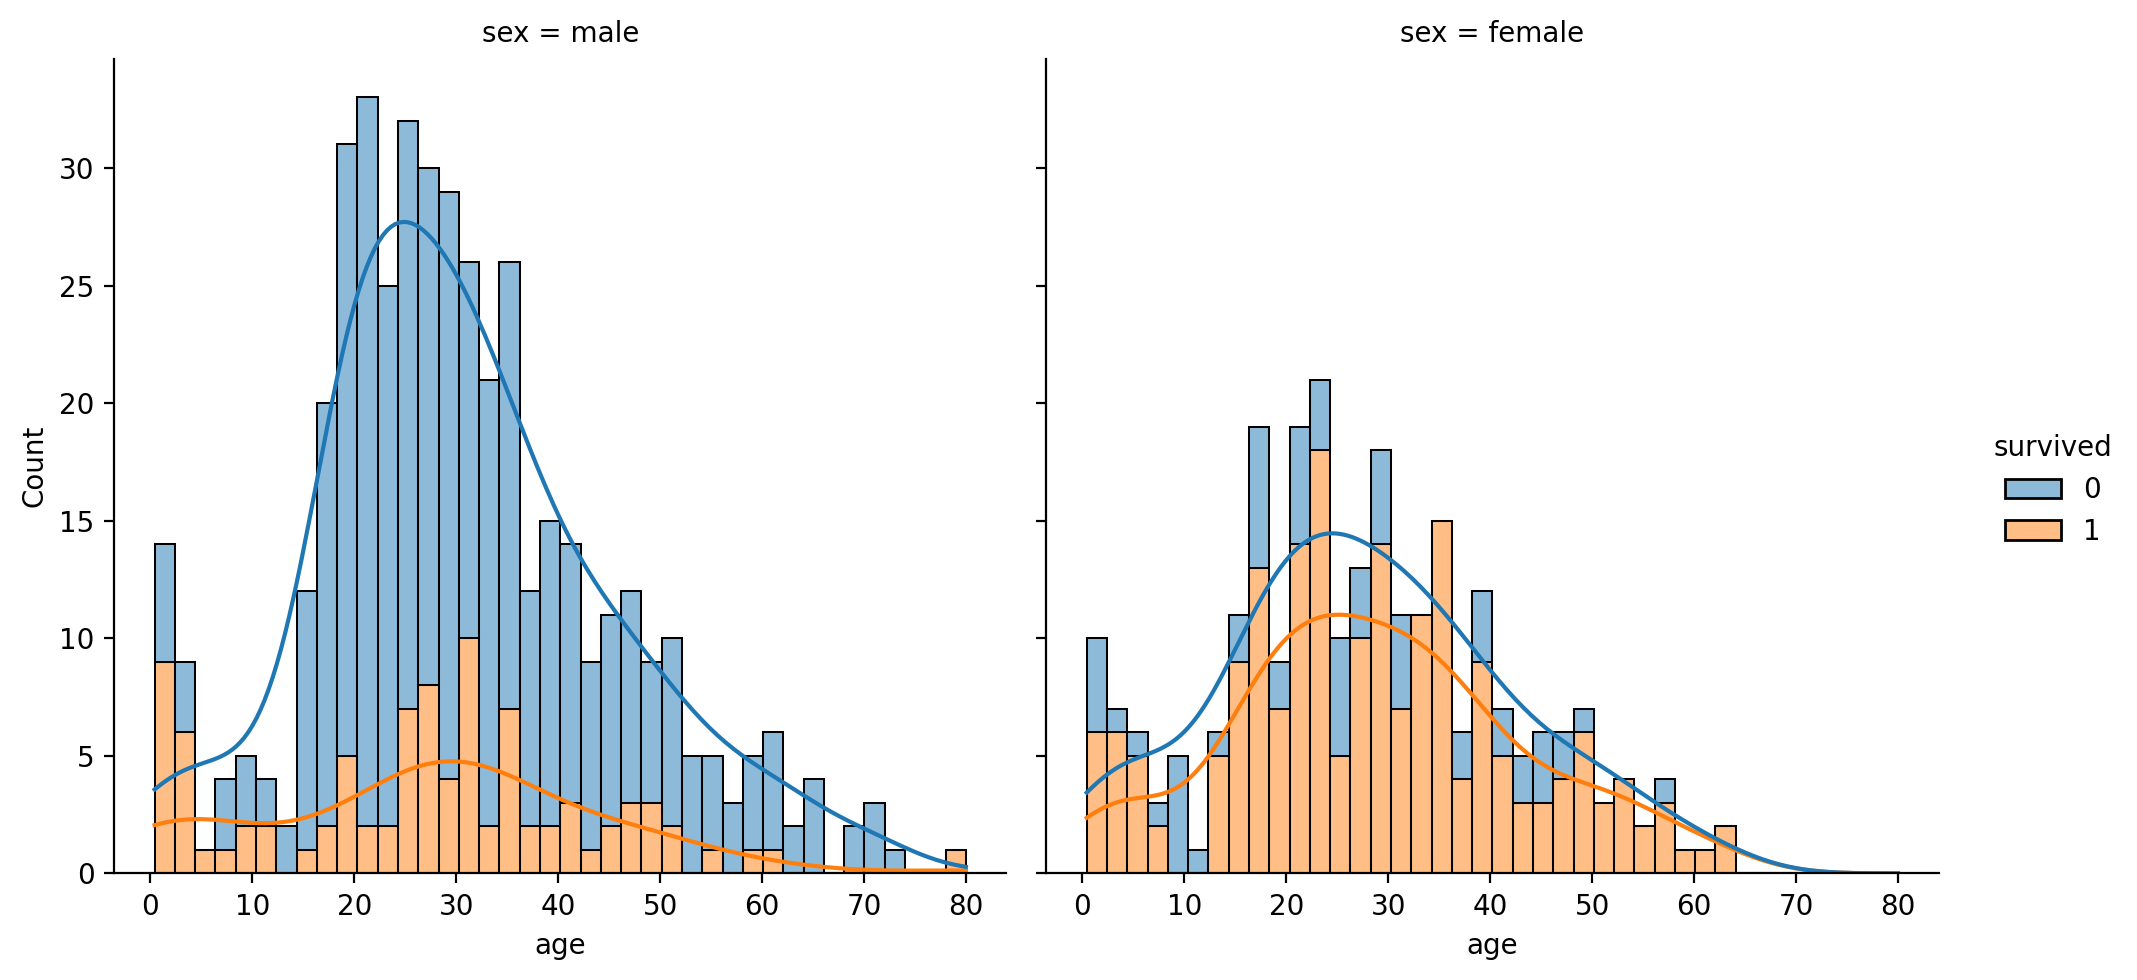

In [54]:
sns.displot(data = titanic, x = 'age', kde = True, bins = 40, edgecolor = 'black', color = 'blue',
            hue = 'survived', multiple = 'stack', col = 'sex')

In [55]:
titanic['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [56]:
titanic[titanic['survived'] == 1]['sex'].value_counts()

sex
female    233
male      109
Name: count, dtype: int64

In [57]:
fem = 233/314
men = 109/577

In [58]:
print(f"{int(men*100)}% percent of men survived \n{int(fem*100)}% percent of women survived")

18% percent of men survived 
74% percent of women survived


In [59]:
total_mean_age = titanic['age'].mean()

In [60]:
mean_age_men = titanic[titanic['sex'] == 'male']['age'].mean()
mean_age_women = titanic[titanic['sex'] == 'female']['age'].mean()

In [61]:
print("Percentage")
print(f"Total mean age: {total_mean_age:.2f}")
print(f"mean age of men {mean_age_men:.2f}")
print(f"mean age of women {mean_age_women:.2f}")

Percentage
Total mean age: 29.70
mean age of men 30.73
mean age of women 27.92


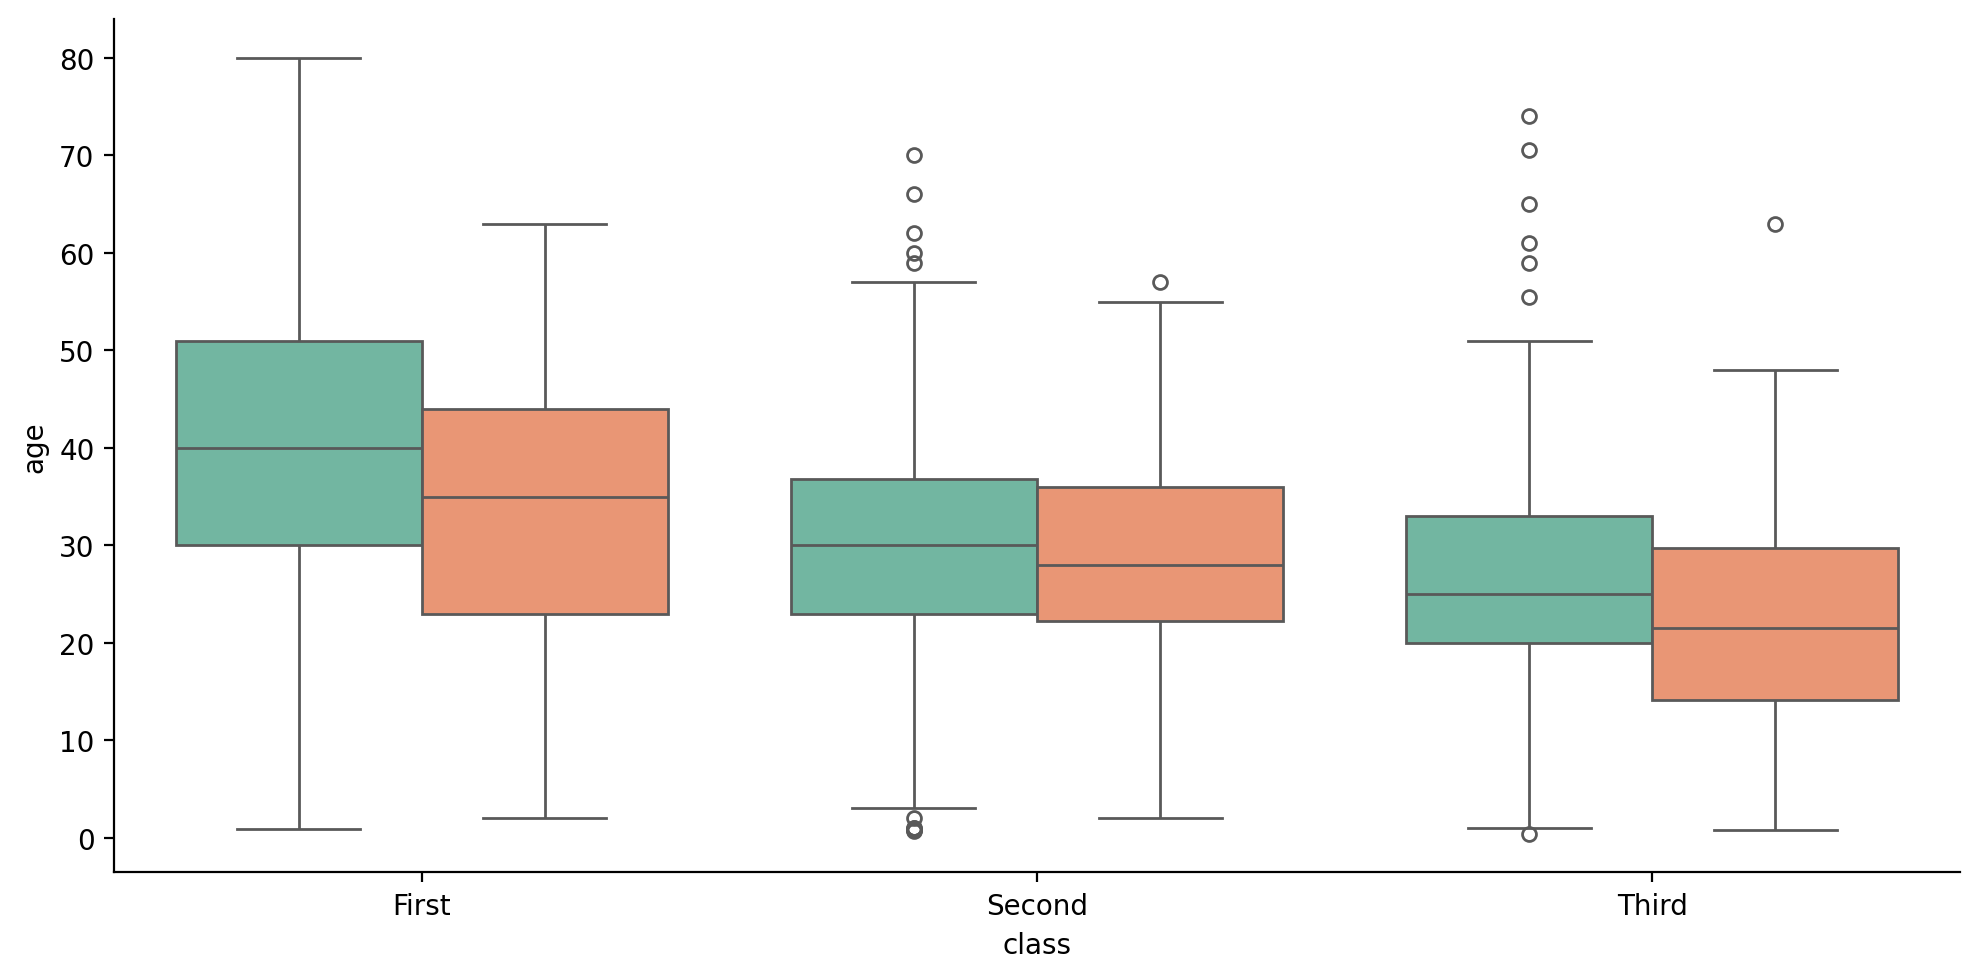

In [62]:
sns.catplot(data=titanic, x='class', y='age', kind='box',
            hue='sex', legend=False,
            height=5, aspect=2, palette='Set2')

In [63]:
def impute_age(pclass, sex):
    if sex == 'male':
        if pclass == 1:
            return titanic[(titanic['pclass'] == 1) & (titanic['sex'] == 'male')]['age'].mean()
        elif pclass == 2:
            return titanic[(titanic['pclass'] == 2) & (titanic['sex'] == 'male')]['age'].mean()
        elif pclass == 3:
            return titanic[(titanic['pclass'] == 3) & (titanic['sex'] == 'male')]['age'].mean()
        
    else:
        if pclass == 1:
            return titanic[(titanic['pclass'] == 1) & (titanic['sex'] == 'female')]['age'].mean()
        elif pclass == 2:
            return titanic[(titanic['pclass'] == 2) & (titanic['sex'] == 'female')]['age'].mean()
        elif pclass == 3:
            return titanic[(titanic['pclass'] == 3) & (titanic['sex'] == 'female')]['age'].mean()

In [64]:
impute_age(2, 'male')

np.float64(30.74070707070707)

In [65]:
titanic['age'] = titanic.apply(lambda x: impute_age(x['pclass'], x['sex']) if np.isnan(x['age']) else x['age'], axis=1)

In [66]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

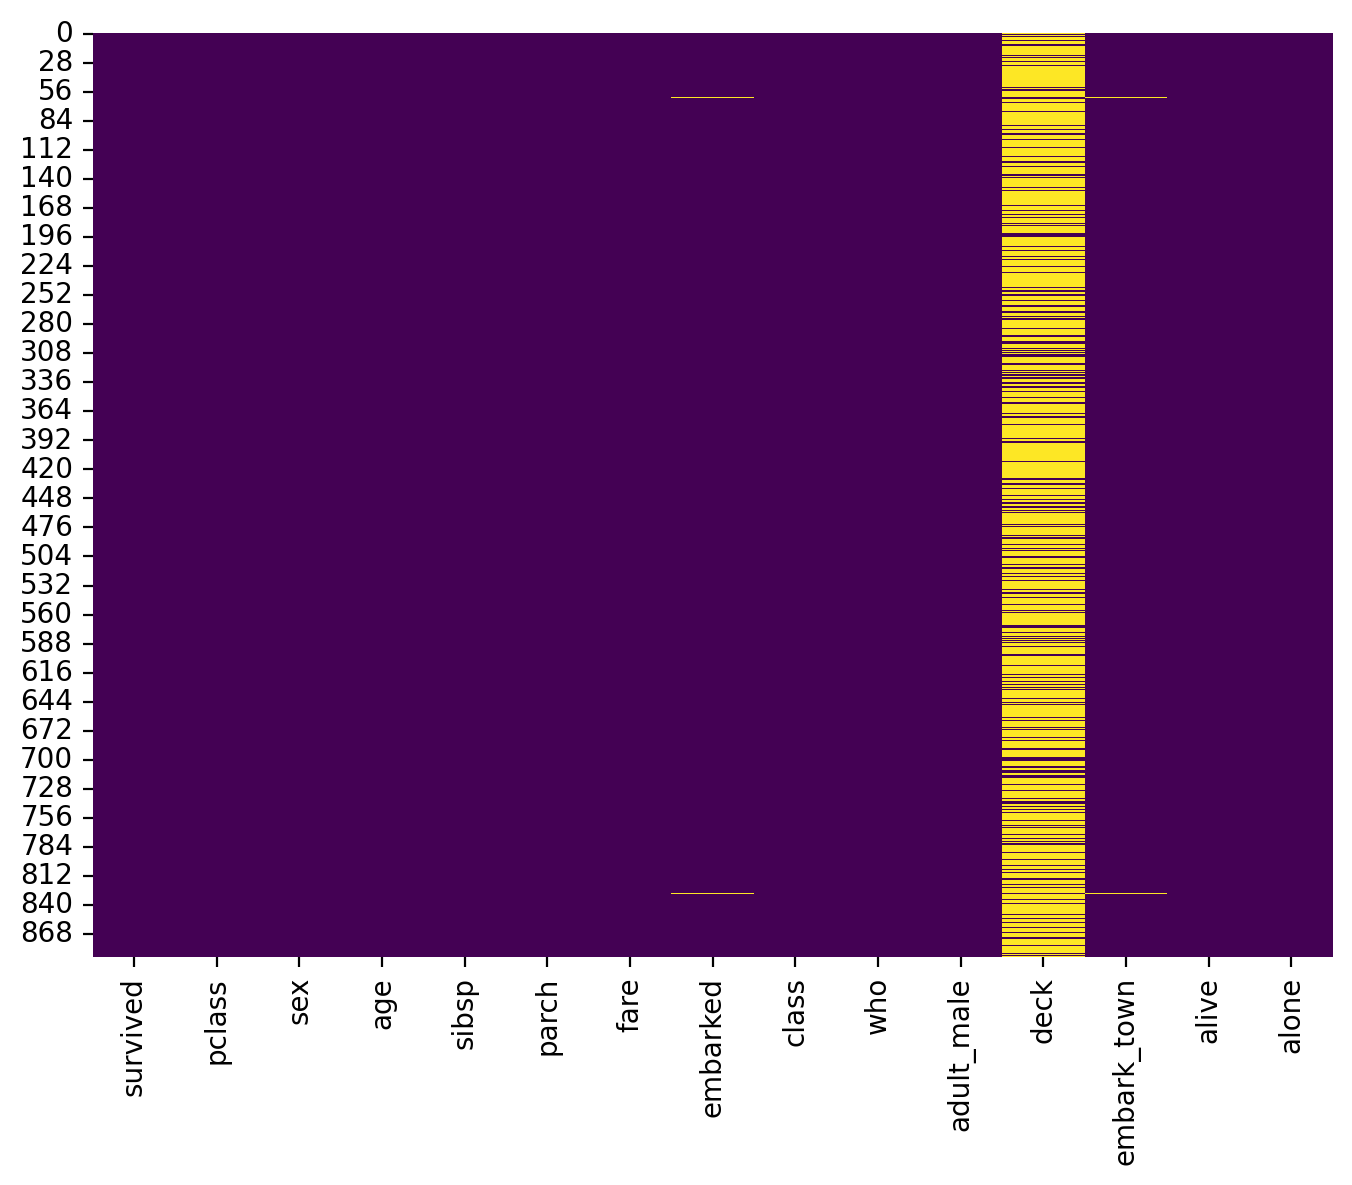

In [67]:
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')

In [68]:
titanic['embark_town']

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

c:\Users\arash\OneDrive\Desktop\Code\Github_Repositories\MachineLearning\Practical_MasterClass\ML\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\arash\OneDrive\Desktop\Code\Github_Repositories\MachineLearning\Practical_MasterClass\ML\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\arash\OneDrive\Desktop\Code\Github_Repositories\MachineLearning\Practical_MasterClass\ML\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)


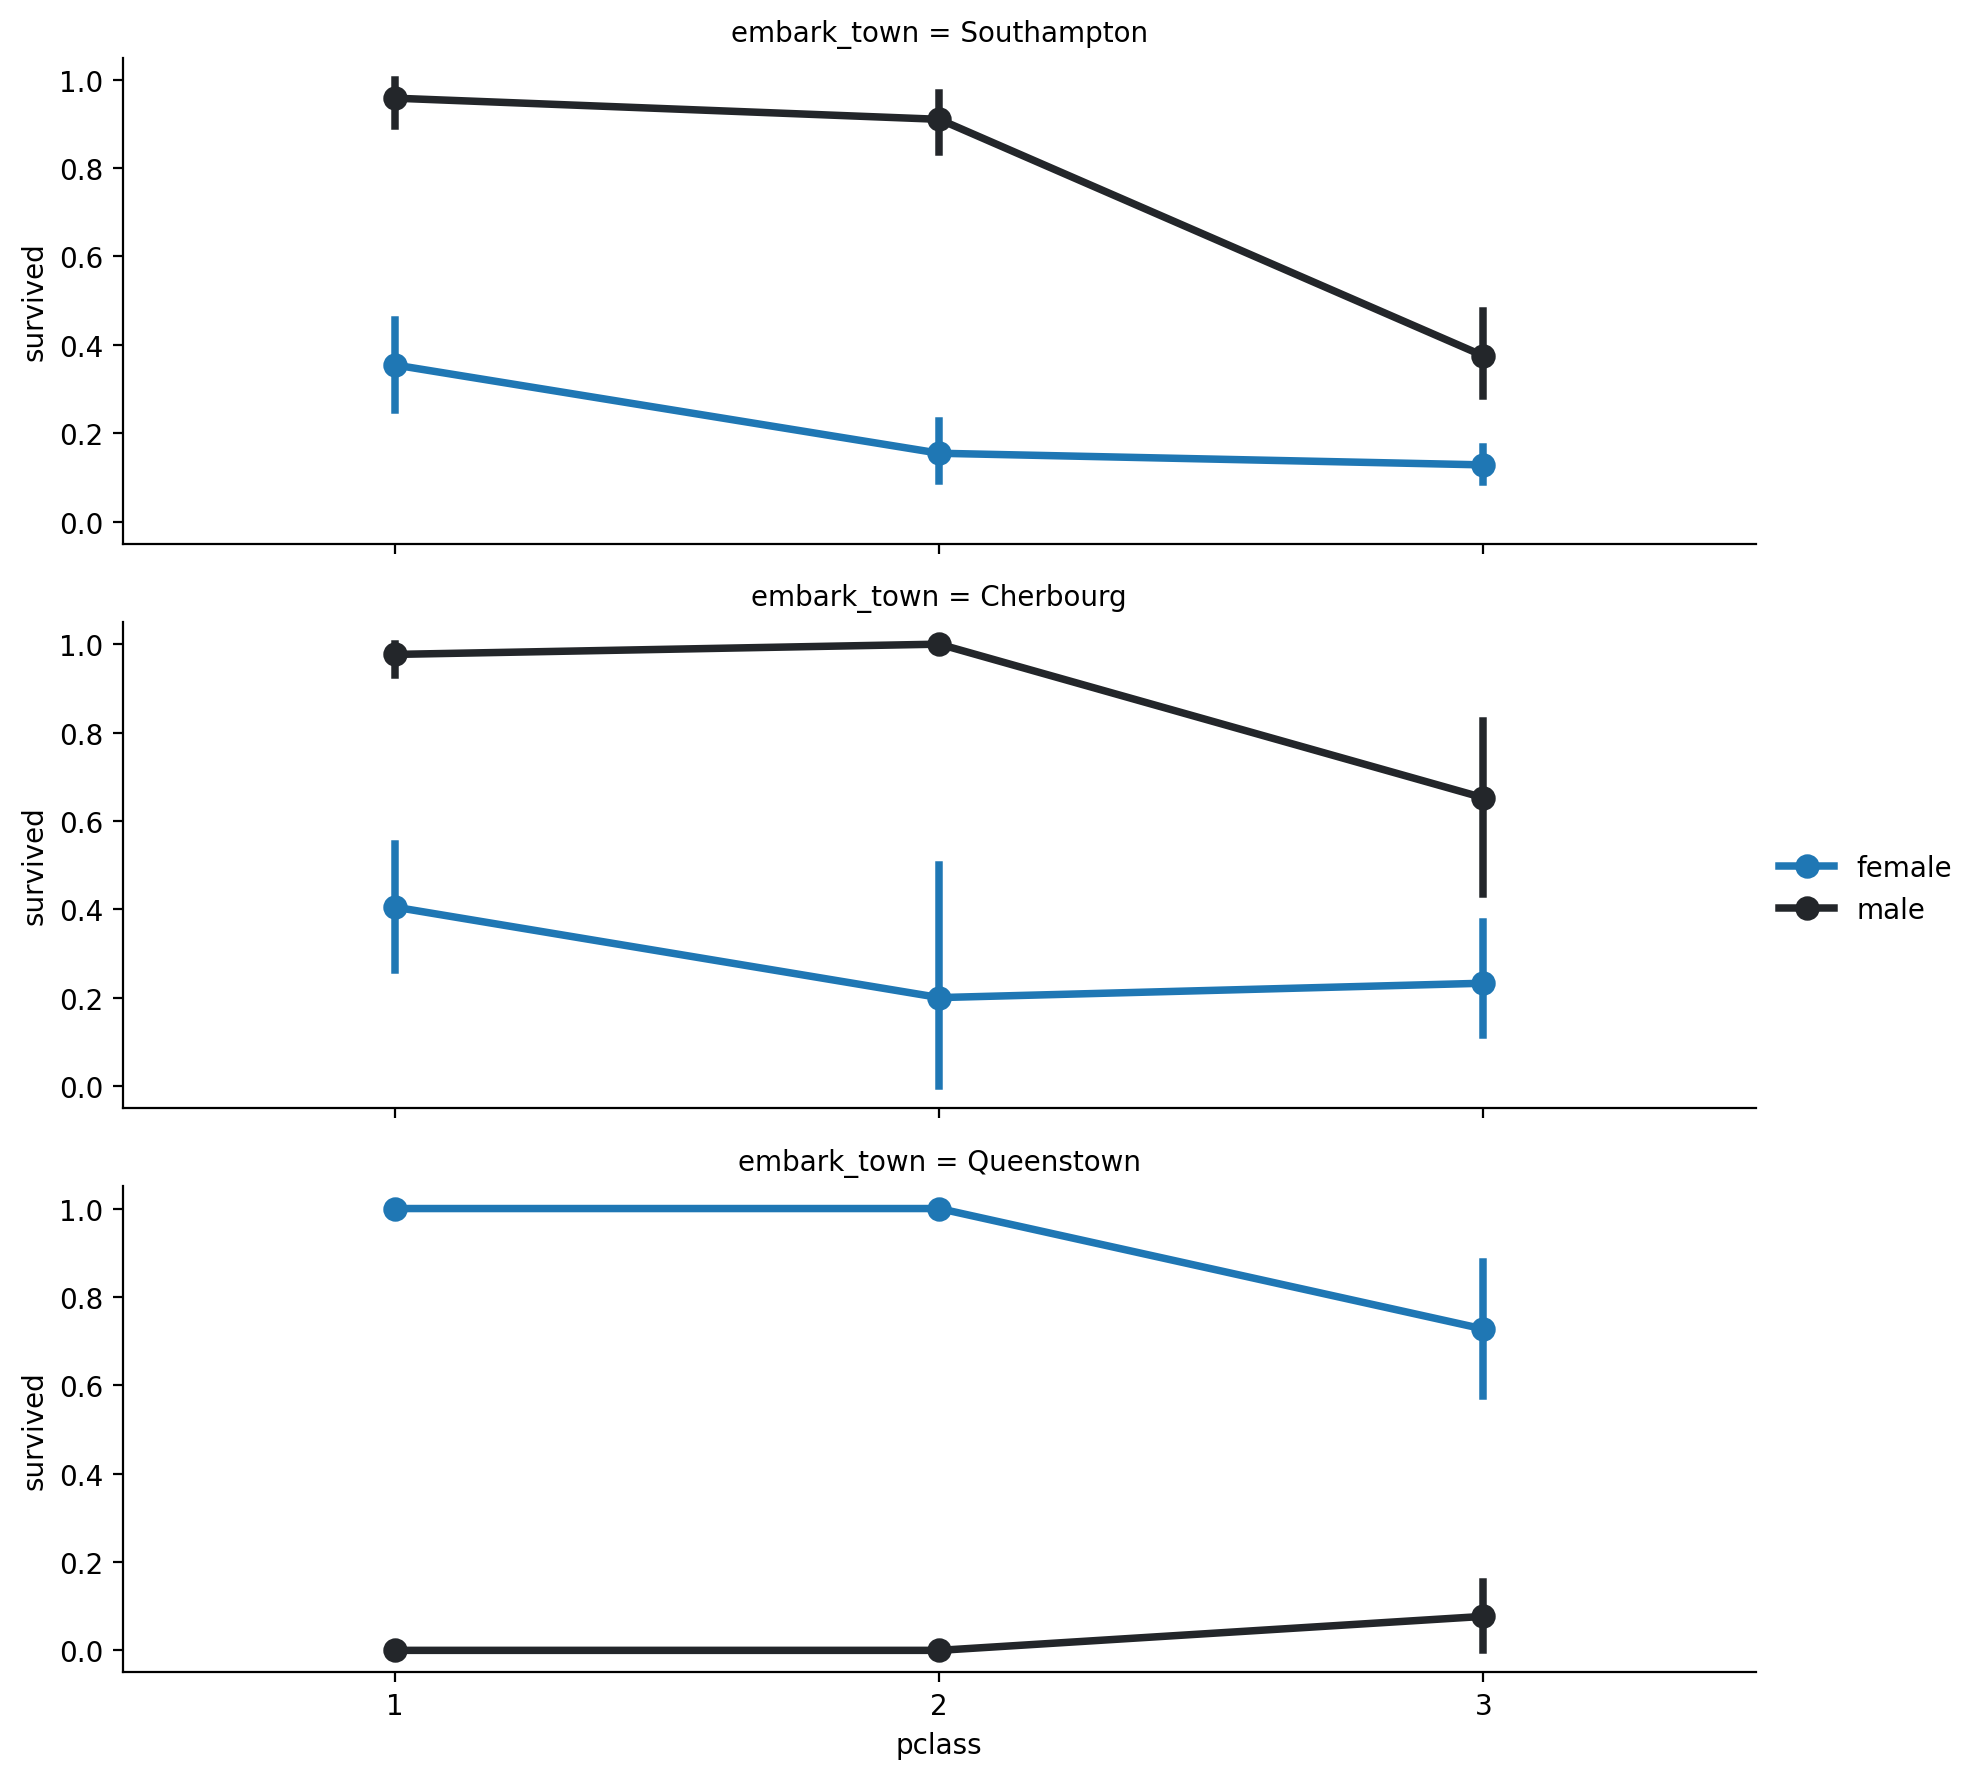

In [69]:
f = sns.FacetGrid(titanic, row = 'embark_town', height = 3,  aspect = 3)

f.map(sns.pointplot, 'pclass', 'survived', 'sex', 
        order = None,  hue_order = None)
f.add_legend()



In [70]:
titanic.groupby('embark_town')['survived'].mean()

embark_town
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.336957
Name: survived, dtype: float64

In [71]:
titanic['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [72]:
titanic['embark_town'].isnull().sum()

np.int64(2)

In [73]:
titanic['embark_town'].fillna('Southampton', inplace = True)
titanic['embarked'].fillna('S', inplace = True)

C:\Users\arash\AppData\Local\Temp\ipykernel_30884\1602971038.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna('S', inplace = True)


In [74]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [75]:
titanic.drop(['deck', 'embark_town', 'alive'], inplace = True, axis = 1)

In [76]:
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

In [77]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [78]:
titanic['age'] = titanic['age'].astype('int')
titanic['pclass'] = titanic['pclass'].astype('int')


In [79]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    int64   
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(5), object(3)
memory usage: 65.5+ KB


In [80]:
genders = {'male':0, 'female':1}
titanic['sex'] = titanic['sex'].map(genders)

In [86]:
titanic['adult_male'] = titanic['adult_male'].map({True: 1, False: 0})


In [82]:
titanic['alone'] = titanic['alone'].map({True: 1, False: 0})


In [87]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    int64   
 3   age         891 non-null    int64   
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    int64   
 11  alone       891 non-null    int64   
dtypes: category(1), float64(1), int64(8), object(2)
memory usage: 77.7+ KB


In [88]:
pd.get_dummies(titanic, columns = [ 'embarked', 'who'] )

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,alone,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,0,22,1,0,7.2500,Third,1,0,False,False,True,False,True,False
1,1,1,1,38,1,0,71.2833,First,0,0,True,False,False,False,False,True
2,1,3,1,26,0,0,7.9250,Third,0,1,False,False,True,False,False,True
3,1,1,1,35,1,0,53.1000,First,0,0,False,False,True,False,False,True
4,0,3,0,35,0,0,8.0500,Third,1,1,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,Second,1,1,False,False,True,False,True,False
887,1,1,1,19,0,0,30.0000,First,0,1,False,False,True,False,False,True
888,0,3,1,21,1,2,23.4500,Third,0,0,False,False,True,False,False,True
889,1,1,0,26,0,0,30.0000,First,1,1,True,False,False,False,True,False
